In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data set
df=pd.read_csv(r"C:\Users\Admin\Downloads\ml project\Python_Clustering_Pr11.csv")

In [3]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [4]:
df.shape

(889, 13)

In [5]:
#2. Check null values
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [6]:
#3. Print information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [7]:
#4. Describe dataset in statistic form
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#5. Drop under risk column
df=df.drop("UnderRisk",axis=1)

In [9]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0


In [10]:
#1. Apply Kmean clustering on dataset
from sklearn.cluster import KMeans

In [11]:
cls=KMeans(n_clusters=3,)
cls.fit(df)

KMeans(n_clusters=3)

In [12]:
print("wcss_score;",cls.inertia_)

wcss_score; 494.89108467221035


In [13]:
#wcss score for range 1 t to 10
wcss=[]
for i in range(1,11):
    cls=KMeans(n_clusters=i)
    cls.fit(df)
    wcss.append(cls.inertia_)

In [15]:
cls.inertia_

206.68224740782912

In [16]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


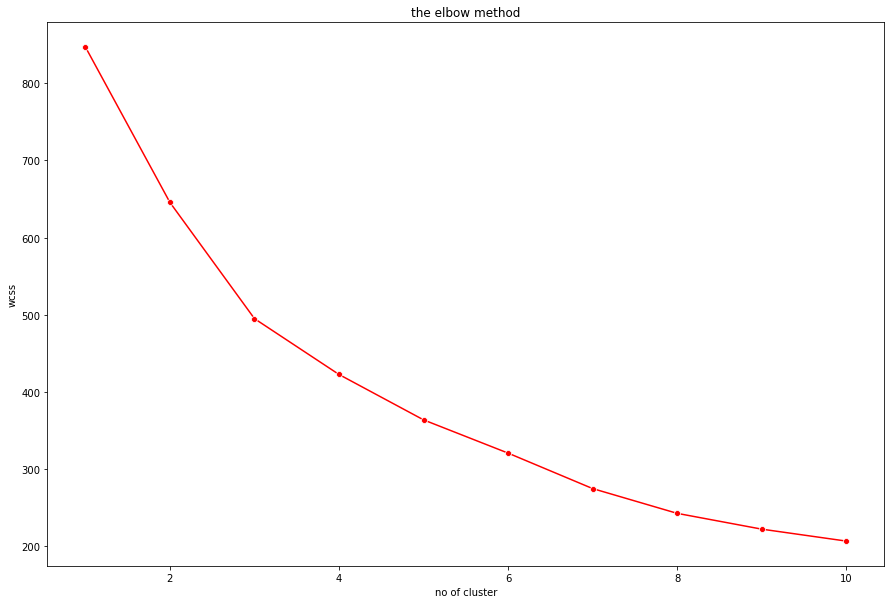

In [17]:
plt.figure(figsize=(15,10))
sns.lineplot(range(1,11),wcss,marker="o",color="red")
plt.title("the elbow method")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [18]:
#2print cluster center
kmeans=KMeans(n_clusters=6)
y_kmeans=kmeans.fit_predict(df)

In [21]:
kmeans.cluster_centers_

array([[ 1.16853933e+00,  3.37078652e-02,  0.00000000e+00,
         1.57303371e-01,  1.00000000e+00,  2.24719101e-02,
         1.12359551e-02,  0.00000000e+00,  7.86516854e-01,
        -1.04083409e-17,  5.61797753e-02,  3.37078652e-02],
       [ 9.59619952e-01,  2.22044605e-16,  1.00000000e+00,
         8.31353919e-02,  1.00000000e+00,  7.83847981e-02,
        -4.16333634e-17, -1.52655666e-16,  9.80997625e-01,
         2.85035629e-02,  1.66270784e-02,  3.56294537e-02],
       [ 1.00000000e+00,  1.11111111e-01,  1.94444444e-01,
         2.77777778e-02,  0.00000000e+00,  8.33333333e-02,
         1.00000000e+00,  1.00000000e+00,  5.55555556e-02,
        -3.46944695e-18,  0.00000000e+00, -6.93889390e-18],
       [ 2.00000000e+00,  3.27102804e-02,  1.00000000e+00,
         4.20560748e-02,  1.00000000e+00,  3.27102804e-02,
        -2.77555756e-17,  4.67289720e-03,  9.81308411e-01,
         0.00000000e+00,  4.67289720e-03,  3.27102804e-02],
       [ 1.04301075e+00,  1.00000000e+00,  7.2043010

In [22]:
#3. Create column cluster for predicted labels value
df["cluster"]=y_kmeans

In [23]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,4
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,2


In [24]:
#4. Plot the hierarchical clustering using scipy
from scipy.cluster.hierarchy import linkage,dendrogram
merg=linkage(df,method="ward")
merg

array([[0.00000000e+00, 6.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 8.90000000e+02, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.75500000e+03, 1.77300000e+03, 1.93838256e+01, 5.46000000e+02],
       [1.76100000e+03, 1.77200000e+03, 2.21801757e+01, 3.43000000e+02],
       [1.77400000e+03, 1.77500000e+03, 5.51735380e+01, 8.89000000e+02]])

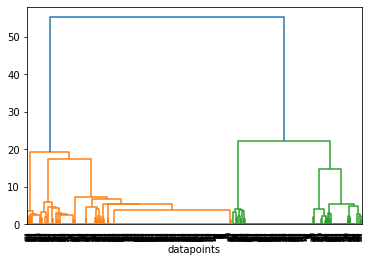

In [25]:
dendrogram(merg)
plt.xlabel("datapoints")
plt.ylabel=("euclidean distance")
plt.show()

In [26]:
#5. Apply Agglomerative Clustering using number of clusters
from sklearn.cluster import AgglomerativeClustering

In [27]:
hc=AgglomerativeClustering()

In [28]:
hc.fit(df)

AgglomerativeClustering()

In [29]:
hc=AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage="ward")
cluster=hc.fit_predict(df)

In [30]:
cluster

array([4, 0, 0, 0, 3, 2, 5, 2, 0, 5, 0, 2, 1, 0, 0, 0, 2, 0, 4, 0, 0, 0,
       4, 2, 0, 4, 0, 5, 0, 0, 2, 4, 2, 4, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 4, 2, 0, 1, 0, 0, 0, 4, 1, 0, 4, 4, 1, 2, 5, 0, 2, 0, 4,
       1, 0, 4, 2, 4, 0, 0, 0, 1, 0, 4, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 2, 5, 3, 1, 0, 2, 5, 0, 0, 1, 4, 2, 1, 1,
       1, 0, 0, 4, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 4, 3, 0, 4, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 4, 5, 4, 1, 2, 2, 2, 5, 1, 0, 1, 0, 0, 0, 0,
       0, 4, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 4, 2, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 2, 4, 2, 2, 4, 4, 0, 2, 5, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       4, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 4, 3, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 5, 0, 0, 4, 0, 2, 4, 0, 1, 0, 0, 0, 0,
       0, 4, 2, 0, 4, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 4, 0, 5, 0,
       0, 0, 1, 2, 2, 0, 0, 0, 4, 2, 0, 1, 2, 1, 0,

In [31]:
#6. Create label column for predicted cluster label
df["label"]=cluster

In [32]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster,label
0,1,1,1,0,1,0,0,0,1,0,0,0,4,4
1,1,0,1,0,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,1,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,1,0,0,0,0,2,3


In [33]:
df["label"].value_counts()

0    421
2    214
4     93
1     89
3     36
5     36
Name: label, dtype: int64

In [34]:
#8. Show a silhouette score
from sklearn.metrics import silhouette_score

In [35]:
silh_score=silhouette_score(df,cluster)

In [36]:
silh_score

0.7502155501107745